In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math as m
import pandas as pd

In [41]:
# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)

    # calculate the variance of the samples
    s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)

    # calculate the pooled standard deviation
    s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))

    # calculate the means of the samples
    u1, u2 = np.mean(d1), np.mean(d2)

    # calculate the effect size
    return (u1 - u2) / s


# # seed random number generator
# from numpy.random import seed
# from numpy.random import randn
# seed(1)
# # prepare data
# data1 = 10 * randn(10000) + 60
# data2 = 10 * randn(10000) + 55
# # calculate cohen's d
# d = cohend(data1, data2)
# print('Cohens d: %.3f' % d)

Cohens d: 0.500


In [20]:

FPR_filenames = [
    "data/FPR_R1R2_p3/FPR_R1R2_p3_Epsilon.csv", "data/FPR_R1R2_p3/FPR_R1R2_p3_HV.csv", "data/FPR_R1R2_p3/FPR_R1R2_p3_IGD.csv",
    "data/FPR_R1R2_p2p3/FPR_R1R2_p2p3_Epsilon.csv", "data/FPR_R1R2_p2p3/FPR_R1R2_p2p3_HV.csv", "data/FPR_R1R2_p2p3/FPR_R1R2_p2p3_IGD.csv",
    "data/FPR_R1R2_p1p2p3/FPR_R1R2_p1p2p3_Epsilon.csv", "data/FPR_R1R2_p1p2p3/FPR_R1R2_p1p2p3_HV.csv", "data/FPR_R1R2_p1p2p3/FPR_R1R2_p1p2p3_IGD.csv"
]


In [25]:
FPR_Results = []
for filename in FPR_filenames:
    df = pd.read_csv(filename, delimiter='\t')

    test_result = stats.kruskal(df.iloc[:,1], df.iloc[:,2], df.iloc[:,3])


    print (test_result)
    FPR_Results.append(test_result)

KruskalResult(statistic=58.438778998779014, pvalue=2.0425861172532406e-13)
KruskalResult(statistic=58.14427350427354, pvalue=2.3666358088636074e-13)
KruskalResult(statistic=58.75174603174605, pvalue=1.7467085581476688e-13)
KruskalResult(statistic=44.140463980464006, pvalue=2.600279501192823e-10)
KruskalResult(statistic=43.71028083028085, pvalue=3.224282725457752e-10)
KruskalResult(statistic=49.6704273504273, pvalue=1.637584594114501e-11)
KruskalResult(statistic=50.96976800976802, pvalue=8.55176001134337e-12)
KruskalResult(statistic=59.22666666666669, pvalue=1.3775036001620005e-13)
KruskalResult(statistic=16.985299145299166, pvalue=0.0002049694585414388)


In [38]:
for filename in FPR_filenames:
    df = pd.read_csv(filename, delimiter='\t')

    # test_result = stats.kruskal(df.iloc[:,1], df.iloc[:,2], df.iloc[:,3])
    comp12 = stats.mannwhitneyu(x=df.iloc[:,1], y=df.iloc[:,2], alternative='two-sided')
    comp13 = stats.mannwhitneyu(x=df.iloc[:,1], y=df.iloc[:,3], alternative='two-sided')
    comp23 = stats.mannwhitneyu(x=df.iloc[:,2], y=df.iloc[:,3], alternative='two-sided')

    print (comp12,"\n", comp13, "\n", comp23, "\n")


MannwhitneyuResult(statistic=364.0, pvalue=0.20620548705301323) 
 MannwhitneyuResult(statistic=2.0, pvalue=3.6897258539809896e-11) 
 MannwhitneyuResult(statistic=11.0, pvalue=8.993406027014868e-11) 

MannwhitneyuResult(statistic=506.0, pvalue=0.4119108371475996) 
 MannwhitneyuResult(statistic=900.0, pvalue=3.019859359162157e-11) 
 MannwhitneyuResult(statistic=888.0, pvalue=9.918628618948002e-11) 

MannwhitneyuResult(statistic=369.0, pvalue=0.2339889162810581) 
 MannwhitneyuResult(statistic=0.0, pvalue=3.019859359162157e-11) 
 MannwhitneyuResult(statistic=10.0, pvalue=8.152744512218774e-11) 

MannwhitneyuResult(statistic=468.0, pvalue=0.795845542466455) 
 MannwhitneyuResult(statistic=60.0, pvalue=8.48477290014798e-09) 
 MannwhitneyuResult(statistic=64.0, pvalue=1.2023264598302062e-08) 

MannwhitneyuResult(statistic=513.0, pvalue=0.3554724725943107) 
 MannwhitneyuResult(statistic=825.0, pvalue=3.0810543518021204e-08) 
 MannwhitneyuResult(statistic=845.0, pvalue=5.4617466566169245e-09) 



In [45]:
for filename in FPR_filenames:
    df = pd.read_csv(filename, delimiter='\t')

    cohen12 = cohend(d1=df.iloc[:,1], d2=df.iloc[:,2])
    cohen13 = cohend(d1=df.iloc[:,1], d2=df.iloc[:,3])
    cohen23 = cohend(d1=df.iloc[:,2], d2=df.iloc[:,3])

    print (cohen12,"\n", cohen13,"\n", cohen23, "\n")


-0.35544527620997474 
 -1.4256919174371079 
 -1.399975424608248 

0.31507906966782123 
 1.3791532663593098 
 1.3534289411578977 

-0.33214477333492176 
 -1.3172529867371638 
 -1.296417000739587 

-0.08920491164822646 
 -1.6208578080239262 
 -1.5389760235058094 

-0.13240193439323222 
 1.2454261810668752 
 1.2757113620424345 

-0.23448377356159436 
 -1.682333483159343 
 -1.5645293265777325 

0.42189339831129213 
 -1.0190378090380552 
 -1.0426766093128932 

-0.03341132257410311 
 0.9829686526868198 
 0.9844235330386916 

-0.40677658399951044 
 -0.928109865939132 
 -0.7973410100710095 



----

In [26]:

FX_filenames = [
    "data/FX_R1R2_p5_100000/FX_R1R2_p5_100000_Epsilon.csv", "data/FX_R1R2_p5_100000/FX_R1R2_p5_100000_HV.csv", "data/FX_R1R2_p5_100000/FX_R1R2_p5_100000_IGD.csv",
    "data/FX_R1R2_p4p5_100000/FX_R1R2_p4p5_100000_Epsilon.csv", "data/FX_R1R2_p4p5_100000/FX_R1R2_p4p5_100000_HV.csv", "data/FX_R1R2_p4p5_100000/FX_R1R2_p4p5_100000_IGD.csv",
    "data/FX_R1R2_p2p4p5_100000/FX_R1R2_p2p4p5_100000_Epsilon.csv", "data/FX_R1R2_p2p4p5_100000/FX_R1R2_p2p4p5_100000_HV.csv", "data/FX_R1R2_p2p4p5_100000/FX_R1R2_p2p4p5_100000_IGD.csv"
]


In [27]:
FX_Results =[]
for filename in FX_filenames:
    df = pd.read_csv(filename, delimiter='\t')

    test_result = stats.kruskal(df.iloc[:,1], df.iloc[:,2], df.iloc[:,3])

    print (test_result)
    FX_Results.append(test_result)

KruskalResult(statistic=56.38183150183153, pvalue=5.712692524699613e-13)
KruskalResult(statistic=56.215677655677666, pvalue=6.207556753467728e-13)
KruskalResult(statistic=56.57328449328446, pvalue=5.191195213485008e-13)
KruskalResult(statistic=58.55892551892555, pvalue=1.9234942415297392e-13)
KruskalResult(statistic=59.86647130647134, pvalue=1.0003706243511626e-13)
KruskalResult(statistic=57.61592185592184, pvalue=3.082205095628349e-13)
KruskalResult(statistic=59.4649084249084, pvalue=1.2228106205946333e-13)
KruskalResult(statistic=59.269841269841265, pvalue=1.3480856836410314e-13)
KruskalResult(statistic=59.52068376068371, pvalue=1.1891803979107367e-13)


In [39]:
for filename in FX_filenames:
    df = pd.read_csv(filename, delimiter='\t')

    # test_result = stats.kruskal(df.iloc[:,1], df.iloc[:,2], df.iloc[:,3])
    comp12 = stats.mannwhitneyu(x=df.iloc[:,1], y=df.iloc[:,2], alternative='two-sided')
    comp13 = stats.mannwhitneyu(x=df.iloc[:,1], y=df.iloc[:,3], alternative='two-sided')
    comp23 = stats.mannwhitneyu(x=df.iloc[:,2], y=df.iloc[:,3], alternative='two-sided')

    print (comp12,"\n", comp13, "\n", comp23, "\n")


MannwhitneyuResult(statistic=574.0, pvalue=0.06786886081944325) 
 MannwhitneyuResult(statistic=31.0, pvalue=6.121039395876217e-10) 
 MannwhitneyuResult(statistic=6.0, pvalue=5.494052450965186e-11) 

MannwhitneyuResult(statistic=326.0, pvalue=0.06786886081944325) 
 MannwhitneyuResult(statistic=870.0, pvalue=5.572653248454238e-10) 
 MannwhitneyuResult(statistic=892.0, pvalue=6.69551896550012e-11) 

MannwhitneyuResult(statistic=581.0, pvalue=0.05368525328679823) 
 MannwhitneyuResult(statistic=31.0, pvalue=6.121039395876217e-10) 
 MannwhitneyuResult(statistic=6.0, pvalue=5.494052450965186e-11) 

MannwhitneyuResult(statistic=305.0, pvalue=0.03265093917842125) 
 MannwhitneyuResult(statistic=6.0, pvalue=5.494052450965186e-11) 
 MannwhitneyuResult(statistic=17.0, pvalue=1.6132250444697864e-10) 

MannwhitneyuResult(statistic=565.0, pvalue=0.090490360906144) 
 MannwhitneyuResult(statistic=898.0, pvalue=3.6897258539809896e-11) 
 MannwhitneyuResult(statistic=896.0, pvalue=4.504322112705282e-11) 



In [46]:
for filename in FX_filenames:
    df = pd.read_csv(filename, delimiter='\t')

    cohen12 = cohend(d1=df.iloc[:,1], d2=df.iloc[:,2])
    cohen13 = cohend(d1=df.iloc[:,1], d2=df.iloc[:,3])
    cohen23 = cohend(d1=df.iloc[:,2], d2=df.iloc[:,3])

    print (cohen12,"\n", cohen13,"\n", cohen23, "\n")


0.5330958189859546 
 -2.0335776185759635 
 -2.269539141801349 

-0.5729785380629209 
 2.24531367390252 
 2.550800172759561 

0.5640008457866356 
 -2.074308396831376 
 -2.312031642965816 

-0.5132678098833012 
 -2.4853404544817024 
 -2.327774937401549 

0.3565691135989184 
 2.62775839648161 
 2.5244695463084685 

-0.4633215222440479 
 -2.4711620936242173 
 -2.3386341750513733 

-0.07714299859903571 
 -2.5683499304380297 
 -2.5636757377685617 

0.10461670238216515 
 3.1087487991669693 
 3.139329112740469 

-0.08648210074758685 
 -2.5679671604265994 
 -2.559425739825111 



## Conformance Statistical Analysis

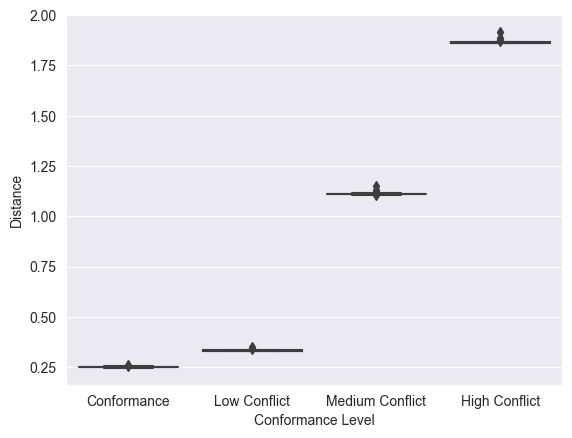

In [110]:
DATA_DIR = 'data'
CONFORMANCE_OPTIONS = [0, 1, 2, 3]
conformance_files = ['FPR_Conformance_' + str(i) + '_BestSolutions.csv' for i in CONFORMANCE_OPTIONS]
conformanceLabels = ['Conformance', 'Low Conflict', 'Medium Conflict', 'High Conflict']
colHeaders = [conformanceLabels[i] for i in CONFORMANCE_OPTIONS]



from EPIK_visualisation import do_conformance_boxplots
do_conformance_boxplots(data_dir=DATA_DIR, conformance_files=conformance_files, colHeaders=colHeaders)

In [111]:
from EPIK_visualisation import prepare_conformance_data
dfData = prepare_conformance_data(DATA_DIR, conformance_files, colHeaders)

dfData.head()

,Conformance,Low Conflict,Medium Conflict,High Conflict
0,0.254518,0.330333,1.114345,1.863003
1,0.250113,0.334542,1.10908,1.86062
2,0.253369,0.333105,1.108972,1.860481
3,0.263050,0.332528,1.110944,1.868765
4,0.251471,0.33082,1.112661,1.864062


In [112]:
#Apply Kruskal Wallis
stats.kruskal(dfData.iloc[:,0], dfData.iloc[:,1], dfData.iloc[:,2], dfData.iloc[:,3])


KruskalResult(statistic=111.57024793388427, pvalue=5.0394632691027984e-24)

In [113]:
comp01 = stats.mannwhitneyu(x=dfData.iloc[:,0].tolist(), y=dfData.iloc[:,1].tolist(), alternative='two-sided')
comp02 = stats.mannwhitneyu(x=dfData.iloc[:,0].tolist(), y=dfData.iloc[:,2].tolist(), alternative='two-sided')
comp03 = stats.mannwhitneyu(x=dfData.iloc[:,0].tolist(), y=dfData.iloc[:,3].tolist(), alternative='two-sided')
comp12 = stats.mannwhitneyu(x=dfData.iloc[:,1].tolist(), y=dfData.iloc[:,2].tolist(), alternative='two-sided')
comp13 = stats.mannwhitneyu(x=dfData.iloc[:,1].tolist(), y=dfData.iloc[:,3].tolist(), alternative='two-sided')
comp23 = stats.mannwhitneyu(x=dfData.iloc[:,2].tolist(), y=dfData.iloc[:,3].tolist(), alternative='two-sided')

print(comp01,"\n", comp02,"\n", comp03,"\n", comp12,"\n", comp13,"\n", comp23)


MannwhitneyuResult(statistic=0.0, pvalue=3.019859359162157e-11) 
 MannwhitneyuResult(statistic=0.0, pvalue=3.019859359162157e-11) 
 MannwhitneyuResult(statistic=0.0, pvalue=3.019859359162157e-11) 
 MannwhitneyuResult(statistic=0.0, pvalue=3.019859359162157e-11) 
 MannwhitneyuResult(statistic=0.0, pvalue=3.019859359162157e-11) 
 MannwhitneyuResult(statistic=0.0, pvalue=3.019859359162157e-11)


In [114]:
cohen01 = cohend(d1=dfData.iloc[:,0].tolist(), d2=dfData.iloc[:,1].tolist())
cohen02 = cohend(d1=dfData.iloc[:,0].tolist(), d2=dfData.iloc[:,2].tolist())
cohen03 = cohend(d1=dfData.iloc[:,0].tolist(), d2=dfData.iloc[:,3].tolist())
cohen12 = cohend(d1=dfData.iloc[:,1].tolist(), d2=dfData.iloc[:,2].tolist())
cohen13 = cohend(d1=dfData.iloc[:,2].tolist(), d2=dfData.iloc[:,3].tolist())
cohen23 = cohend(d1=dfData.iloc[:,2].tolist(), d2=dfData.iloc[:,3].tolist())

print(cohen01,"\n", cohen02,"\n", cohen03,"\n", cohen12,"\n", cohen13,"\n", cohen23)


-22.288049094711557 
 -140.1707728326573 
 -206.90998008859597 
 -119.83236834261385 
 -79.46408036921974 
 -79.46408036921974


In [116]:
df

,Unnamed: 0,NSGAII,SPEA2,CMAES
0,0,1.913533,4.114123,196.529545
1,1,15.736061,9.183028,141.879656
2,2,11.554552,1.587873,310.513935
3,3,4.396361,3.473497,155.537186
4,4,38.355876,11.776322,258.871440
5,5,2.674065,17.686020,120.695848
6,6,2.120849,2.752843,67.797000
7,7,4.355901,13.286570,272.004573
8,8,2.267084,23.593981,37.801852
9,9,3.945229,16.229226,40.645323


In [121]:
dfData.var()

Conformance        0.000009
Low Conflict       0.000018
Medium Conflict    0.000067
High Conflict      0.000113
dtype: object

In [122]:
dfData.median()

Conformance        0.250253
Low Conflict       0.332147
Medium Conflict    1.111526
High Conflict      1.863868
dtype: object